In [ ]:
# homework 1 ex 2
# Загрузите временной ряд (например, данные о ценах на акции) и создайте модель регрессии, для прогнозирования будущих значений.
# 
# 
# значения меняются скачками
# шумов не нашлось
# LinearRegression и RandomForestRegressor переобучились
# Lasso, Ridge и XBoost вообще непонятно что сделали
#
# 
#

2025-03-03 18:32:41.851582 load csv
                 dt    open   close    high     low                Date
0  2008.01.02 10:00  1.4661  1.4661  1.4666  1.4658 2008-01-02 10:00:00
1  2008.01.02 10:15  1.4660  1.4652  1.4661  1.4651 2008-01-02 10:15:00
2  2008.01.02 10:30  1.4651  1.4657  1.4657  1.4651 2008-01-02 10:30:00
3  2008.01.02 10:45  1.4656  1.4653  1.4657  1.4650 2008-01-02 10:45:00
4  2008.01.02 11:00  1.4652  1.4655  1.4663  1.4650 2008-01-02 11:00:00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24414 entries, 0 to 24413
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dt      24414 non-null  object        
 1   open    24414 non-null  float64       
 2   close   24414 non-null  float64       
 3   high    24414 non-null  float64       
 4   low     24414 non-null  float64       
 5   Date    24414 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 1.1+ MB
N

d:\temp\ipykernel_11640\2077141958.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels, palette='viridis')


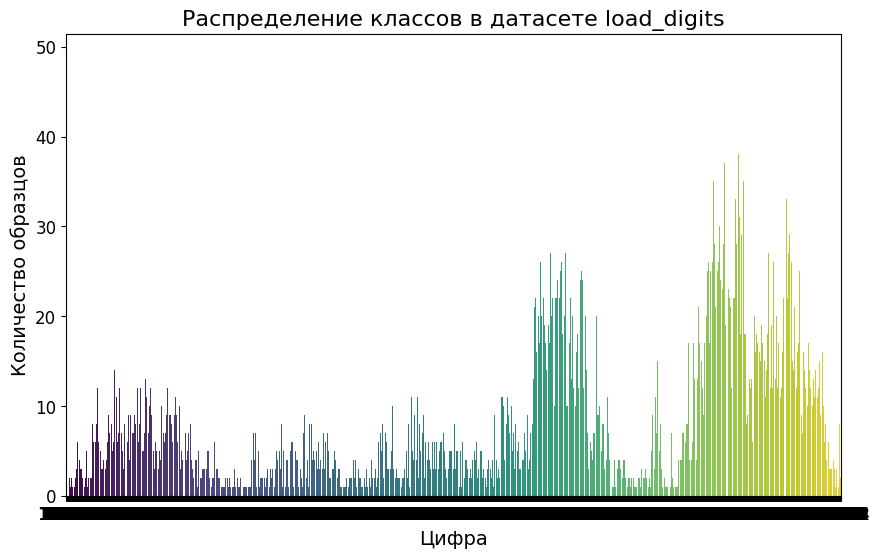

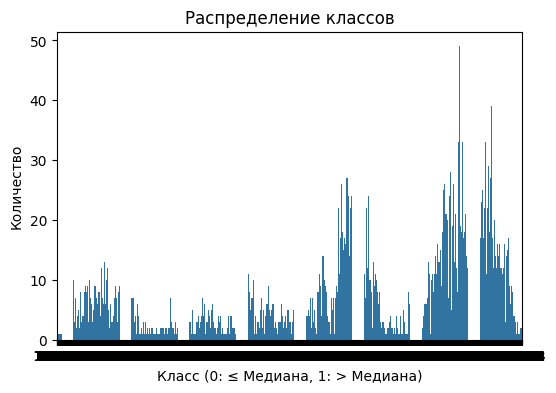

2025-03-03 18:33:12.945341 finish


In [4]:
from datetime import datetime
import pandas as pd
import numpy as np
import dill
import matplotlib.pyplot as plt
import os as os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pprint as pprint
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Функция для вывода разделителей
def print_separator(title):
    print("\n" + "="*80)
    print(title)
    print("="*80 + "\n")

# 2. Распределение классов
def plot_class_distribution(labels):
    print_separator("2. Распределение классов в датасете load_digits")
    plt.figure(figsize=(10, 6))
    sns.countplot(x=labels, palette='viridis')
    plt.title('Распределение классов в датасете load_digits', fontsize=16)
    plt.xlabel('Цифра', fontsize=14)
    plt.ylabel('Количество образцов', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


print(datetime.now(), "load csv")
dataset = pd.read_csv('hw1ex2-rates.csv')
dataset['Date'] = pd.to_datetime(dataset['dt'])

print(dataset.head())
print(dataset.info())
print(dataset.describe())

print("plot_class_distribution:")
plot_class_distribution(dataset['close'].values)


# Обзор распределения классов
plt.figure(figsize=(6,4))
sns.countplot(x='close', data=dataset)
plt.title('Распределение классов')
plt.xlabel('Класс (0: ≤ Медиана, 1: > Медиана)')
plt.ylabel('Количество')
plt.show()


print(datetime.now(), "finish")

In [ ]:
# Линейная регрессия
# Выбросов похоже нет

2025-03-03 18:39:27.904208 load csv
                 dt    open   close    high     low                Date
0  2008.01.02 10:00  1.4661  1.4661  1.4666  1.4658 2008-01-02 10:00:00
1  2008.01.02 10:15  1.4660  1.4652  1.4661  1.4651 2008-01-02 10:15:00
2  2008.01.02 10:30  1.4651  1.4657  1.4657  1.4651 2008-01-02 10:30:00
3  2008.01.02 10:45  1.4656  1.4653  1.4657  1.4650 2008-01-02 10:45:00
4  2008.01.02 11:00  1.4652  1.4655  1.4663  1.4650 2008-01-02 11:00:00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24414 entries, 0 to 24413
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dt      24414 non-null  object        
 1   open    24414 non-null  float64       
 2   close   24414 non-null  float64       
 3   high    24414 non-null  float64       
 4   low     24414 non-null  float64       
 5   Date    24414 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 1.1+ MB
N

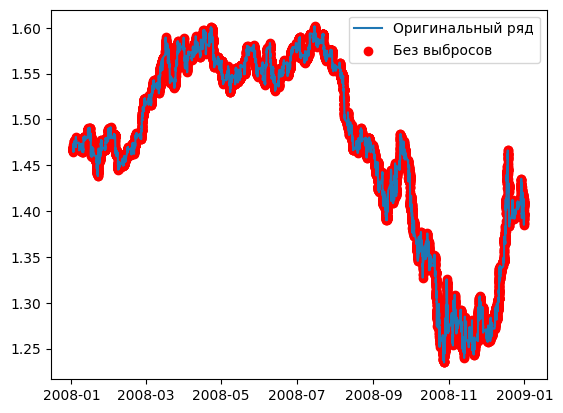

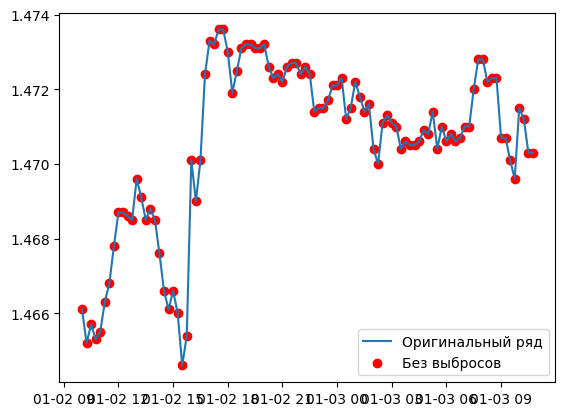

удаление выбросов 2
                 dt    open   close    high     low                Date
0  2008.01.02 10:00  1.4661  1.4661  1.4666  1.4658 2008-01-02 10:00:00
1  2008.01.02 10:15  1.4660  1.4652  1.4661  1.4651 2008-01-02 10:15:00
2  2008.01.02 10:30  1.4651  1.4657  1.4657  1.4651 2008-01-02 10:30:00
3  2008.01.02 10:45  1.4656  1.4653  1.4657  1.4650 2008-01-02 10:45:00
4  2008.01.02 11:00  1.4652  1.4655  1.4663  1.4650 2008-01-02 11:00:00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24414 entries, 0 to 24413
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dt      24414 non-null  object        
 1   open    24414 non-null  float64       
 2   close   24414 non-null  float64       
 3   high    24414 non-null  float64       
 4   low     24414 non-null  float64       
 5   Date    24414 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 1.1+ MB
None
            

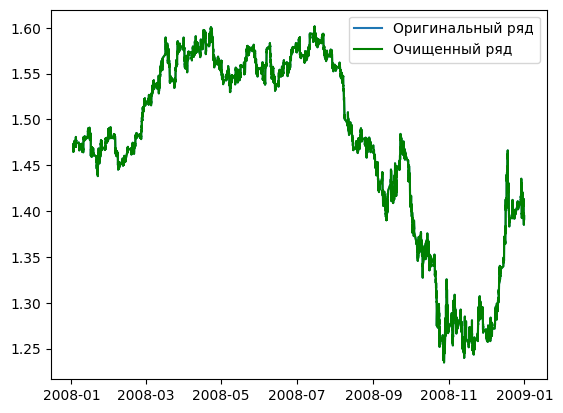

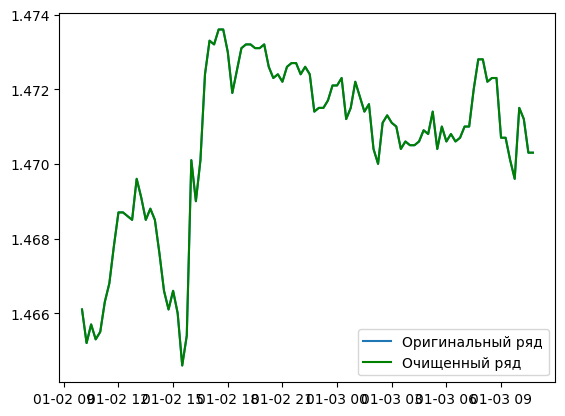

Линейная регрессия
                 dt    open   close    high     low                Date  \
3  2008.01.02 10:45  1.4656  1.4653  1.4657  1.4650 2008-01-02 10:45:00   
4  2008.01.02 11:00  1.4652  1.4655  1.4663  1.4650 2008-01-02 11:00:00   
5  2008.01.02 11:15  1.4657  1.4663  1.4669  1.4650 2008-01-02 11:15:00   
6  2008.01.02 11:30  1.4664  1.4668  1.4673  1.4662 2008-01-02 11:30:00   
7  2008.01.02 11:45  1.4667  1.4678  1.4678  1.4664 2008-01-02 11:45:00   

    lag_1   lag_2   lag_3  
3  1.4657  1.4652  1.4661  
4  1.4653  1.4657  1.4652  
5  1.4655  1.4653  1.4657  
6  1.4663  1.4655  1.4653  
7  1.4668  1.4663  1.4655  
X:
        lag_1   lag_2   lag_3
3      1.4657  1.4652  1.4661
4      1.4653  1.4657  1.4652
5      1.4655  1.4653  1.4657
6      1.4663  1.4655  1.4653
7      1.4668  1.4663  1.4655
...       ...     ...     ...
24409  1.3964  1.3975  1.3970
24410  1.3898  1.3964  1.3975
24411  1.3917  1.3898  1.3964
24412  1.3971  1.3917  1.3898
24413  1.3956  1.3971  1.3917

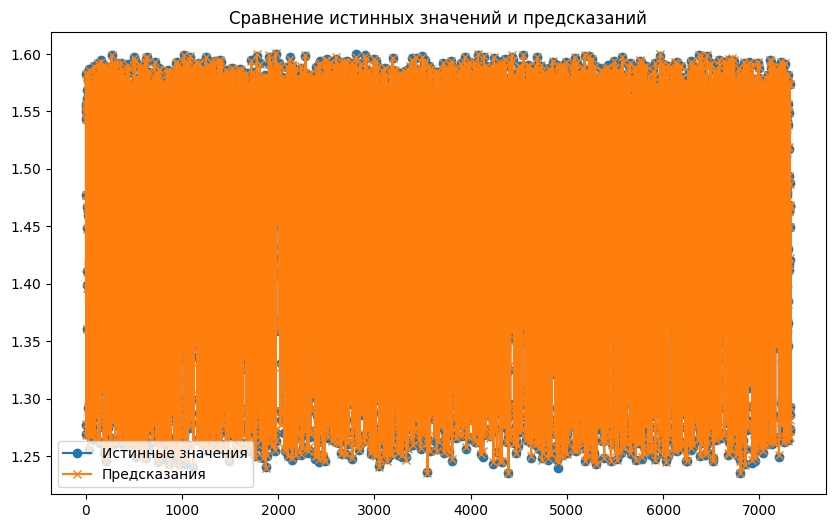

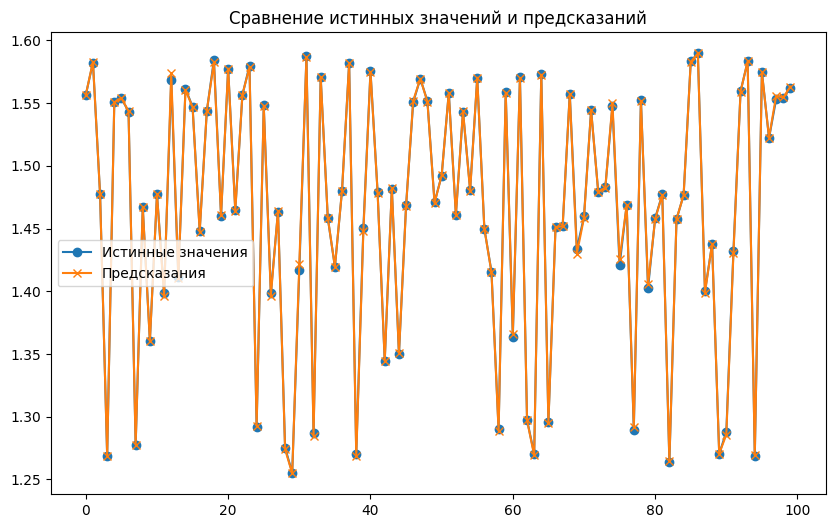

2025-03-03 18:39:30.075104 finish


In [5]:
from datetime import datetime
import pandas as pd
import numpy as np
import dill
import matplotlib.pyplot as plt
import os as os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pprint as pprint
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import seaborn as sns

def create_lag_features(df, lag=3):
    for i in range(1, lag + 1):
        df[f'lag_{i}'] = df['close'].shift(i)
    return df

print(datetime.now(), "load csv")
dataset = pd.read_csv('hw1ex2-rates.csv')
dataset['Date'] = pd.to_datetime(dataset['dt'])

print(dataset.head())
print(dataset.info())
print(dataset.describe())

print("удаление выбросов")
# Расчёт IQR
Q1 = dataset['close'].quantile(0.25)
Q3 = dataset['close'].quantile(0.75)
IQR = Q3 - Q1

# Определение границ
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Удаление выбросов
dataset_no_outliers = dataset[(dataset['close'] >= lower_bound) & (dataset['close'] <= upper_bound)]

print(dataset_no_outliers.head())
print(dataset_no_outliers.info())
print(dataset_no_outliers.describe())

# Визуализация
plt.plot(dataset['Date'], dataset['close'], label='Оригинальный ряд')
plt.scatter(dataset_no_outliers['Date'], dataset_no_outliers['close'], color='red', label='Без выбросов')
plt.legend()
plt.show()
# Визуализация 2
plt.plot(dataset['Date'][:100], dataset['close'][:100], label='Оригинальный ряд')
plt.scatter(dataset_no_outliers['Date'][:100], dataset_no_outliers['close'][:100], color='red', label='Без выбросов')
plt.legend()
plt.show()

print("удаление выбросов 2")
# Вычисление скользящего среднего
window_size = 5
rolling_mean = dataset['close'].rolling(window=window_size, center=True).mean()

# Порог выбросов
threshold = 2 * dataset['close'].std()

# Поиск выбросов
outliers = abs(dataset['close'] - rolling_mean) > threshold

# Замена выбросов на NaN
dataset_cleaned = dataset.copy()
dataset_cleaned.loc[outliers, 'close'] = np.nan

# Интерполяция для заполнения выбросов
dataset_cleaned['close'] = dataset_cleaned['close'].interpolate()

print(dataset_cleaned.head())
print(dataset_cleaned.info())
print(dataset_cleaned.describe())

# Визуализация
plt.plot(dataset['Date'], dataset['close'], label='Оригинальный ряд')
plt.plot(dataset_cleaned['Date'], dataset_cleaned['close'], label='Очищенный ряд', color='green')
plt.legend()
plt.show()
# Визуализация 2
plt.plot(dataset['Date'][:100], dataset['close'][:100], label='Оригинальный ряд')
plt.plot(dataset_cleaned['Date'][:100], dataset_cleaned['close'][:100], label='Очищенный ряд', color='green')
plt.legend()
plt.show()

print("Линейная регрессия")
dataset_lag = create_lag_features(dataset, lag=3)
# Удаление строк с NaN, возникших из-за сдвигов
dataset_lag.dropna(inplace=True)
print(dataset_lag.head())
X = dataset_lag[['lag_1', 'lag_2', 'lag_3']]
y = dataset_lag['close']

print("X:")
pprint.pprint(X)
print("y:")
pprint.pprint(y)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #, stratify=y

if 'model_lag' not in locals():
    model_file_name_lag = "hw1ex2-model-lag.dill"
    if os.path.exists(model_file_name_lag):
        print(datetime.now(), f"load '{model_file_name_lag}'")
        model_lag = dill.load(open(model_file_name_lag, "rb"))
    else:
        model_lag = LinearRegression()
        print(datetime.now(), "train ...")
        model_lag.fit(X_train, y_train)
        print(datetime.now(), f"save '{model_file_name_lag}'")
        dill.dump(model_lag, file = open(model_file_name_lag, "wb"))

print("Предсказание")
y_pred = model_lag.predict(X_test)

print("Оценка модели")
mse = mean_squared_error(y_test, y_pred)
print(f'Средняя квадратичная ошибка: {mse:.2f}')
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R^2 Score: {r2:.4f}")

# Визуализация реальных значений и предсказаний
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Истинные значения', marker='o')
plt.plot(y_pred, label='Предсказания', marker='x')
plt.legend()
plt.title('Сравнение истинных значений и предсказаний')
plt.show()
# Визуализация реальных значений и предсказаний2
plt.figure(figsize=(10, 6))
plt.plot(y_test[:100].values, label='Истинные значения', marker='o')
plt.plot(y_pred[:100], label='Предсказания', marker='x')
plt.legend()
plt.title('Сравнение истинных значений и предсказаний')
plt.show()


print(datetime.now(), "finish")

In [ ]:
# RandomForestRegressor

2025-03-03 18:40:25.632511 load csv
                 dt    open   close    high     low                Date
0  2008.01.02 10:00  1.4661  1.4661  1.4666  1.4658 2008-01-02 10:00:00
1  2008.01.02 10:15  1.4660  1.4652  1.4661  1.4651 2008-01-02 10:15:00
2  2008.01.02 10:30  1.4651  1.4657  1.4657  1.4651 2008-01-02 10:30:00
3  2008.01.02 10:45  1.4656  1.4653  1.4657  1.4650 2008-01-02 10:45:00
4  2008.01.02 11:00  1.4652  1.4655  1.4663  1.4650 2008-01-02 11:00:00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24414 entries, 0 to 24413
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dt      24414 non-null  object        
 1   open    24414 non-null  float64       
 2   close   24414 non-null  float64       
 3   high    24414 non-null  float64       
 4   low     24414 non-null  float64       
 5   Date    24414 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 1.1+ MB
N

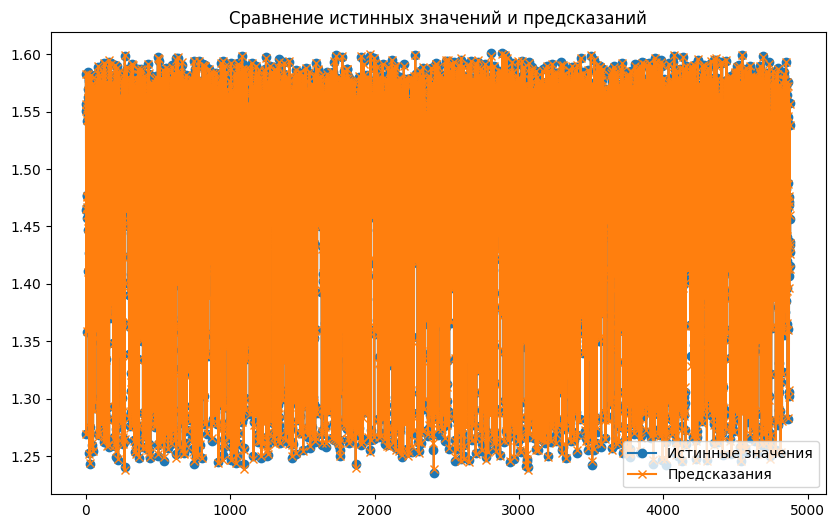

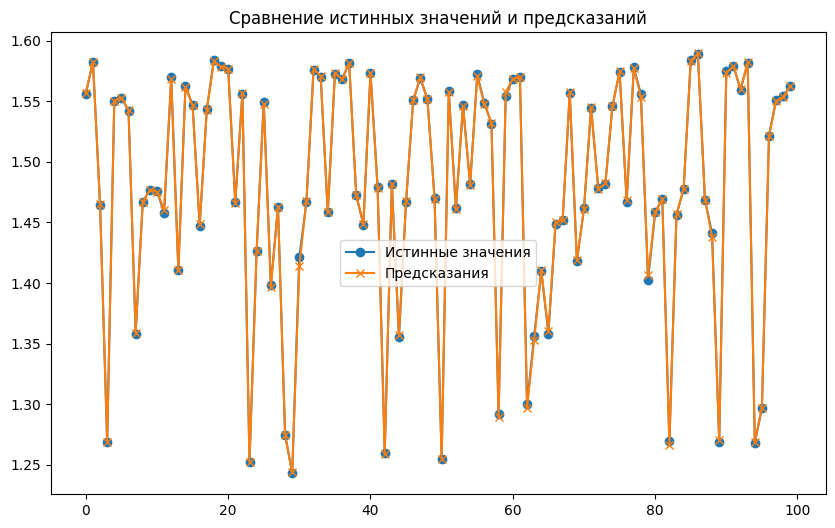

2025-03-03 18:40:33.850610 finish


In [6]:
from datetime import datetime
import pandas as pd
import numpy as np
import dill
import matplotlib.pyplot as plt
import os as os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pprint as pprint
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import seaborn as sns

def create_features(data, window_size=5):
    features = []
    target = []
    for i in range(len(data) - window_size):
        features.append(data[i:i + window_size])
        target.append(data[i + window_size])
    return np.array(features), np.array(target)


print(datetime.now(), "load csv")
dataset = pd.read_csv('hw1ex2-rates.csv')
dataset['Date'] = pd.to_datetime(dataset['dt'])

print(dataset.head())
print(dataset.info())
print(dataset.describe())


print("RandomForestRegressor")
window_size = 5
features, target = create_features(dataset['close'].values, window_size=window_size)


print(datetime.now(), "split...")
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print(datetime.now(), f"Размер X_train: {X_train.shape}, Размер y_train: {y_train.shape}")

#if 'model' not in locals():
model_file_name = "hw1ex2-model-randforest.dill"
if os.path.exists(model_file_name):
    print(datetime.now(), f"load '{model_file_name}'")
    model = dill.load(open(model_file_name, "rb"))
else:
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    print(datetime.now(), "train ...")
    model.fit(X_train, y_train)
    print(datetime.now(), f"save '{model_file_name}'")
    dill.dump(model, file = open(model_file_name, "wb"))

print(datetime.now(),  "predict")
y_pred = model.predict(X_test)

print("Оценка модели")
mse = mean_squared_error(y_test, y_pred)
print(f'Средняя квадратичная ошибка: {mse:.2f}')
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R^2 Score: {r2:.4f}")

# Визуализация реальных значений и предсказаний
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Истинные значения', marker='o')
plt.plot(y_pred, label='Предсказания', marker='x')
plt.legend()
plt.title('Сравнение истинных значений и предсказаний')
plt.show()
# Визуализация реальных значений и предсказаний2
plt.figure(figsize=(10, 6))
plt.plot(y_test[:100], label='Истинные значения', marker='o')
plt.plot(y_pred[:100], label='Предсказания', marker='x')
plt.legend()
plt.title('Сравнение истинных значений и предсказаний')
plt.show()


print(datetime.now(), "finish")

In [ ]:
# Регрессия Ridge

2025-03-03 18:41:42.256852 load csv
                 dt    open   close    high     low                Date
0  2008.01.02 10:00  1.4661  1.4661  1.4666  1.4658 2008-01-02 10:00:00
1  2008.01.02 10:15  1.4660  1.4652  1.4661  1.4651 2008-01-02 10:15:00
2  2008.01.02 10:30  1.4651  1.4657  1.4657  1.4651 2008-01-02 10:30:00
3  2008.01.02 10:45  1.4656  1.4653  1.4657  1.4650 2008-01-02 10:45:00
4  2008.01.02 11:00  1.4652  1.4655  1.4663  1.4650 2008-01-02 11:00:00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24414 entries, 0 to 24413
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dt      24414 non-null  object        
 1   open    24414 non-null  float64       
 2   close   24414 non-null  float64       
 3   high    24414 non-null  float64       
 4   low     24414 non-null  float64       
 5   Date    24414 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 1.1+ MB
N

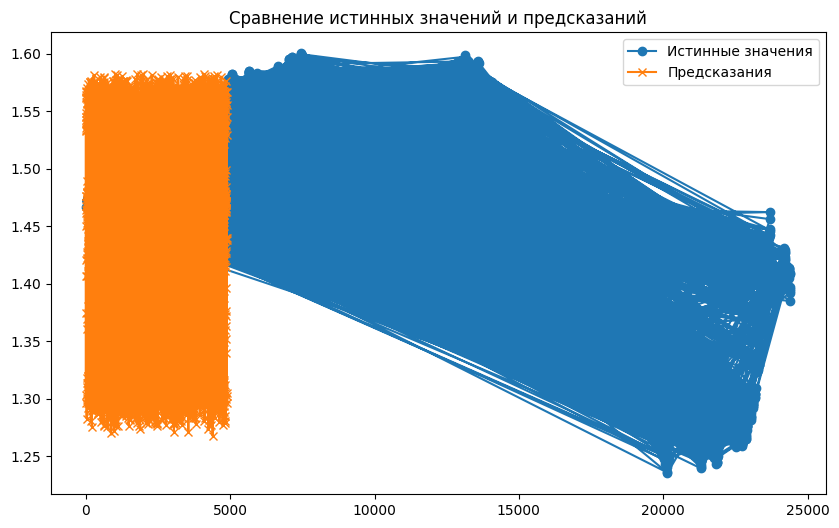

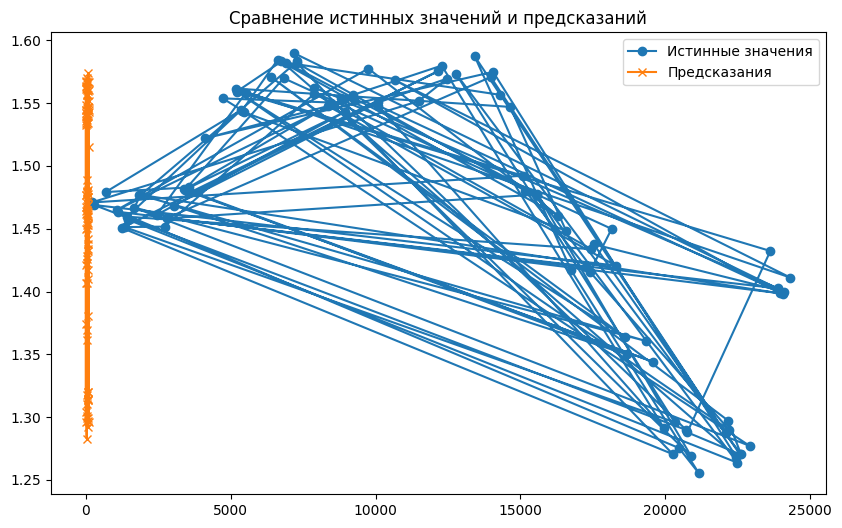

2025-03-03 18:41:43.006886 finish


In [7]:
from datetime import datetime
import pandas as pd
import numpy as np
import dill
import matplotlib.pyplot as plt
import os as os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pprint as pprint
from sklearn.linear_model import Ridge
import seaborn as sns

def create_lag_features(df, lag=3):
    for i in range(1, lag + 1):
        df[f'lag_{i}'] = df['close'].shift(i)
    return df


print(datetime.now(), "load csv")
dataset = pd.read_csv('hw1ex2-rates.csv')
dataset['Date'] = pd.to_datetime(dataset['dt'])

print(dataset.head())
print(dataset.info())
print(dataset.describe())


print("create_lag")
dataset_lag = create_lag_features(dataset, lag=3)
# Удаление строк с NaN, возникших из-за сдвигов
dataset_lag.dropna(inplace=True)
print(dataset_lag.head())
X = dataset_lag[['lag_1', 'lag_2', 'lag_3']]
y = dataset_lag['close']

print("X:")
pprint.pprint(X)
print("y:")
pprint.pprint(y)


print(datetime.now(), "split...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(datetime.now(), f"Размер X_train: {X_train.shape}, Размер y_train: {y_train.shape}")

#if 'model_ridge' not in locals():
ridge_alfa = 100.0
model_file_name = 'hw1ex2-model-ridge-'+str(ridge_alfa)+'.dill'
if os.path.exists(model_file_name):
    print(datetime.now(), f"load '{model_file_name}'")
    model_ridge = dill.load(open(model_file_name, "rb"))
else:
    model_ridge = Ridge(alpha=ridge_alfa)
    print(datetime.now(), "train ...")
    model_ridge.fit(X_train, y_train)
    print(datetime.now(), f"save '{model_file_name}'")
    dill.dump(model_ridge, file = open(model_file_name, "wb"))

print(datetime.now(),  "predict")
y_pred = model_ridge.predict(X_test)

print("Оценка модели")
mse = mean_squared_error(y_test, y_pred)
print(f'Средняя квадратичная ошибка: {mse:.2f}')
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R^2 Score: {r2:.4f}")

# Визуализация реальных значений и предсказаний
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Истинные значения', marker='o')
plt.plot(y_pred, label='Предсказания', marker='x')
plt.legend()
plt.title('Сравнение истинных значений и предсказаний')
plt.show()
# Визуализация реальных значений и предсказаний2
plt.figure(figsize=(10, 6))
plt.plot(y_test[:100], label='Истинные значения', marker='o')
plt.plot(y_pred[:100], label='Предсказания', marker='x')
plt.legend()
plt.title('Сравнение истинных значений и предсказаний')
plt.show()


print(datetime.now(), "finish")

In [ ]:
# regression Lasso

2025-03-03 18:42:36.175681 load csv
                 dt    open   close    high     low                Date
0  2008.01.02 10:00  1.4661  1.4661  1.4666  1.4658 2008-01-02 10:00:00
1  2008.01.02 10:15  1.4660  1.4652  1.4661  1.4651 2008-01-02 10:15:00
2  2008.01.02 10:30  1.4651  1.4657  1.4657  1.4651 2008-01-02 10:30:00
3  2008.01.02 10:45  1.4656  1.4653  1.4657  1.4650 2008-01-02 10:45:00
4  2008.01.02 11:00  1.4652  1.4655  1.4663  1.4650 2008-01-02 11:00:00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24414 entries, 0 to 24413
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dt      24414 non-null  object        
 1   open    24414 non-null  float64       
 2   close   24414 non-null  float64       
 3   high    24414 non-null  float64       
 4   low     24414 non-null  float64       
 5   Date    24414 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 1.1+ MB
N

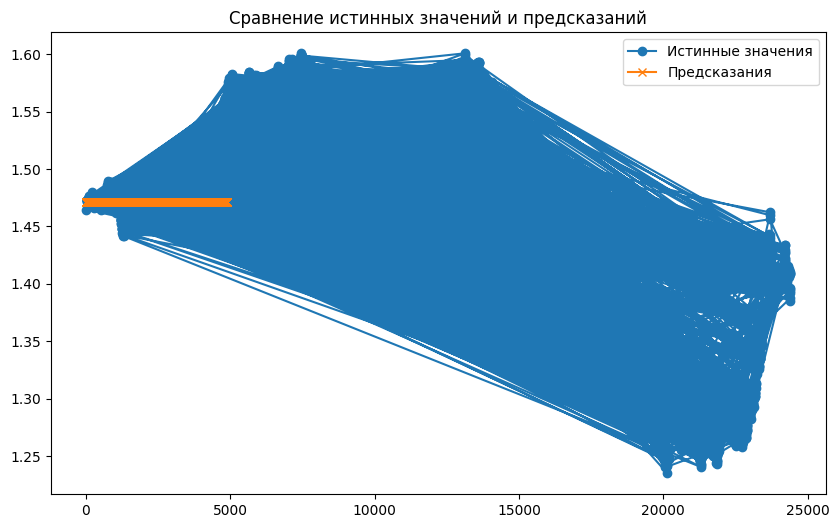

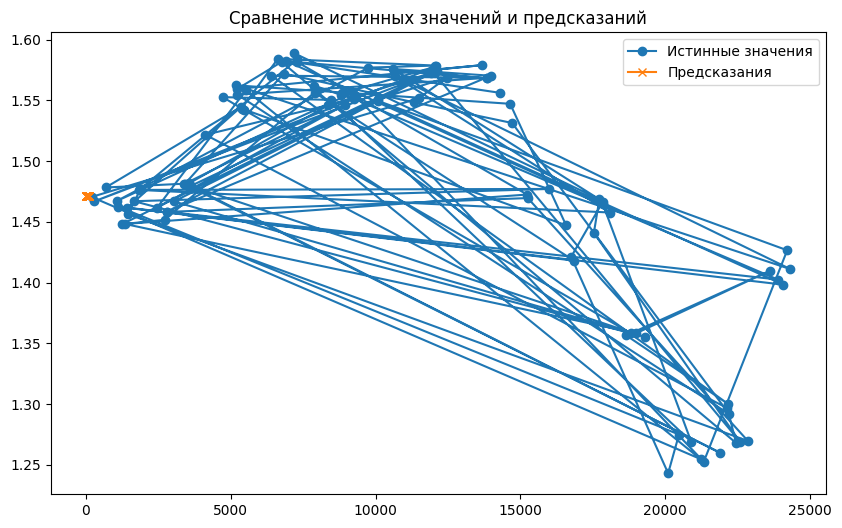

2025-03-03 18:42:37.172239 finish


In [8]:
from datetime import datetime
import pandas as pd
import numpy as np
import dill
import matplotlib.pyplot as plt
import os as os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pprint as pprint
from sklearn.linear_model import Lasso
import seaborn as sns

def create_lag_features(df, lag=5):
    for i in range(1, lag + 1):
        df[f'lag_{i}'] = df['close'].shift(i)
    return df


print(datetime.now(), "load csv")
dataset = pd.read_csv('hw1ex2-rates.csv')
dataset['Date'] = pd.to_datetime(dataset['dt'])

print(dataset.head())
print(dataset.info())
print(dataset.describe())


print("create_lag")
dataset_lag = create_lag_features(dataset, lag=5)
# Удаление строк с NaN, возникших из-за сдвигов
dataset_lag.dropna(inplace=True)
print(dataset_lag.head())
X = dataset_lag[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]
y = dataset_lag['close']

print("X:")
pprint.pprint(X)
print("y:")
pprint.pprint(y)


print(datetime.now(), "split...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(datetime.now(), f"Размер X_train: {X_train.shape}, Размер y_train: {y_train.shape}")

#if 'model_ridge' not in locals():
lasso_alfa = 100.0
model_file_name = 'hw1ex2-model-lasso-'+str(lasso_alfa)+'.dill'
if os.path.exists(model_file_name):
    print(datetime.now(), f"load '{model_file_name}'")
    model_lasso = dill.load(open(model_file_name, "rb"))
else:
    model_lasso = Lasso(alpha=lasso_alfa, random_state=42)
    print(datetime.now(), "train ...")
    model_lasso.fit(X_train, y_train)
    print(datetime.now(), f"save '{model_file_name}'")
    dill.dump(model_lasso, file = open(model_file_name, "wb"))

print(datetime.now(),  "predict")
y_pred = model_lasso.predict(X_test)

print("Оценка модели")
mse = mean_squared_error(y_test, y_pred)
print(f'Средняя квадратичная ошибка: {mse:.2f}')
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R^2 Score: {r2:.4f}")

# Визуализация реальных значений и предсказаний
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Истинные значения', marker='o')
plt.plot(y_pred, label='Предсказания', marker='x')
plt.legend()
plt.title('Сравнение истинных значений и предсказаний')
plt.show()
# Визуализация реальных значений и предсказаний2
plt.figure(figsize=(10, 6))
plt.plot(y_test[:100], label='Истинные значения', marker='o')
plt.plot(y_pred[:100], label='Предсказания', marker='x')
plt.legend()
plt.title('Сравнение истинных значений и предсказаний')
plt.show()


print(datetime.now(), "finish")

In [ ]:
# XBoost

2025-03-03 18:53:35.180528 load csv
                 dt    open   close    high     low                Date
0  2008.01.02 10:00  1.4661  1.4661  1.4666  1.4658 2008-01-02 10:00:00
1  2008.01.02 10:15  1.4660  1.4652  1.4661  1.4651 2008-01-02 10:15:00
2  2008.01.02 10:30  1.4651  1.4657  1.4657  1.4651 2008-01-02 10:30:00
3  2008.01.02 10:45  1.4656  1.4653  1.4657  1.4650 2008-01-02 10:45:00
4  2008.01.02 11:00  1.4652  1.4655  1.4663  1.4650 2008-01-02 11:00:00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24414 entries, 0 to 24413
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dt      24414 non-null  object        
 1   open    24414 non-null  float64       
 2   close   24414 non-null  float64       
 3   high    24414 non-null  float64       
 4   low     24414 non-null  float64       
 5   Date    24414 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 1.1+ MB
N

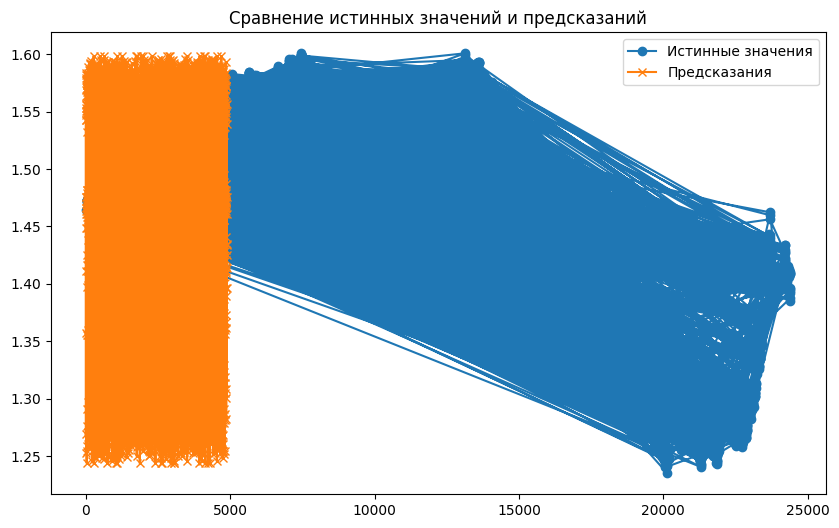

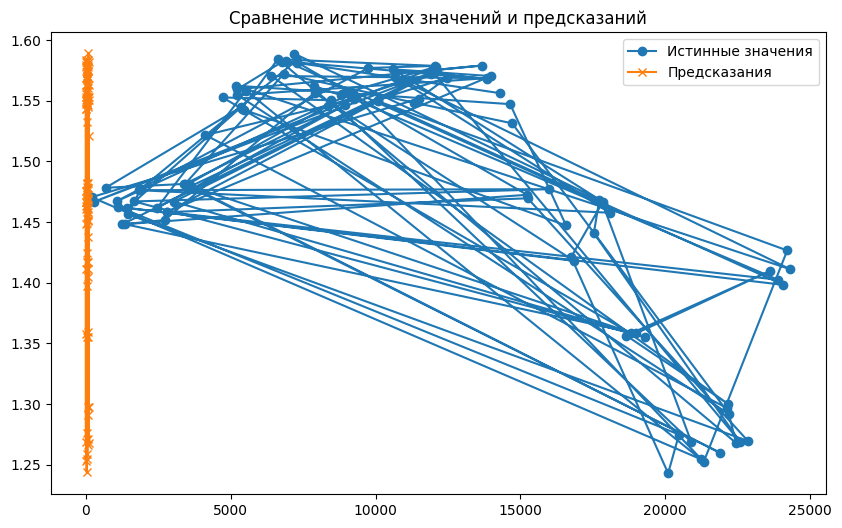

2025-03-03 18:53:35.940071 finish


In [10]:
from datetime import datetime
import pandas as pd
import numpy as np
import dill
import matplotlib.pyplot as plt
import os as os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pprint as pprint
from xgboost import XGBRegressor
import seaborn as sns

def create_lag_features(df, lag=5):
    for i in range(1, lag + 1):
        df[f'lag_{i}'] = df['close'].shift(i)
    return df


print(datetime.now(), "load csv")
dataset = pd.read_csv('hw1ex2-rates.csv')
dataset['Date'] = pd.to_datetime(dataset['dt'])

print(dataset.head())
print(dataset.info())
print(dataset.describe())


print("create_lag")
dataset_lag = create_lag_features(dataset, lag=5)
# Удаление строк с NaN, возникших из-за сдвигов
dataset_lag.dropna(inplace=True)
print(dataset_lag.head())
X = dataset_lag[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]
y = dataset_lag['close']

print("X:")
pprint.pprint(X)
print("y:")
pprint.pprint(y)


print(datetime.now(), "split...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(datetime.now(), f"Размер X_train: {X_train.shape}, Размер y_train: {y_train.shape}")

#if 'model_ridge' not in locals():
n_estimators=100
learning_rate=0.1
max_depth=3
model_file_name = 'hw1ex2-model-xboost-'+str(n_estimators)+'-'+str(learning_rate)+'-'+str(max_depth)+'.dill'
if os.path.exists(model_file_name):
    print(datetime.now(), f"load '{model_file_name}'")
    model_xboost = dill.load(open(model_file_name, "rb"))
else:
    model_xboost = XGBRegressor(objective='reg:squarederror', n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, random_state=42)
    print(datetime.now(), "train ...")
    model_xboost.fit(X_train, y_train)
    print(datetime.now(), f"save '{model_file_name}'")
    dill.dump(model_xboost, file = open(model_file_name, "wb"))

print(datetime.now(),  "predict")
y_pred = model_xboost.predict(X_test)

print("Оценка модели")
mse = mean_squared_error(y_test, y_pred)
print(f'Средняя квадратичная ошибка: {mse:.2f}')
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R^2 Score: {r2:.4f}")

# Визуализация реальных значений и предсказаний
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Истинные значения', marker='o')
plt.plot(y_pred, label='Предсказания', marker='x')
plt.legend()
plt.title('Сравнение истинных значений и предсказаний')
plt.show()
# Визуализация реальных значений и предсказаний2
plt.figure(figsize=(10, 6))
plt.plot(y_test[:100], label='Истинные значения', marker='o')
plt.plot(y_pred[:100], label='Предсказания', marker='x')
plt.legend()
plt.title('Сравнение истинных значений и предсказаний')
plt.show()


print(datetime.now(), "finish")